# THE SPARK FOUNDATION
## TASK 1
### Prediction using Supervised ML
####-ABHISHEK

In [46]:
#Importing the necessary libraries 

import pandas as pd 
import seaborn as sns
import matplotlib as mal
import matplotlib.pyplot as plt 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }

In [28]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

## Exploring DataFrame

In [29]:
df.head() #seeing the first few values of the Dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
df.tail() #seeing the last few values of the Dataset

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [31]:
df.describe() #Checking the statistics of the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
df.info() #Checking for null value and Datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Ploting The Points

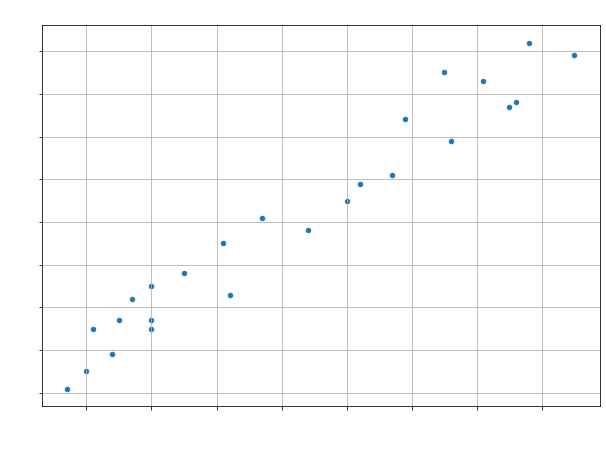

In [33]:
#Plotting a 2D scatter plot for checking how our data allign or to see any pattern in Data

df.plot(kind='scatter', x='Scores', y='Hours',figsize=(10,7));
ax = plt.subplot()
plt.title('Hours vs Percentage',fontdict=font)
plt.setp(ax.get_xticklabels(), color='white')
plt.setp(ax.get_yticklabels(), color='white')
plt.xlabel('Hours',fontdict=font)
plt.ylabel('Scores',fontdict=font)
plt.grid()
plt.show()

OBSERVATION :
1. We can see clearly through scatter plot that our datapoints are exibiting Linearity
2. And there are no outliers so no need of data manipulation

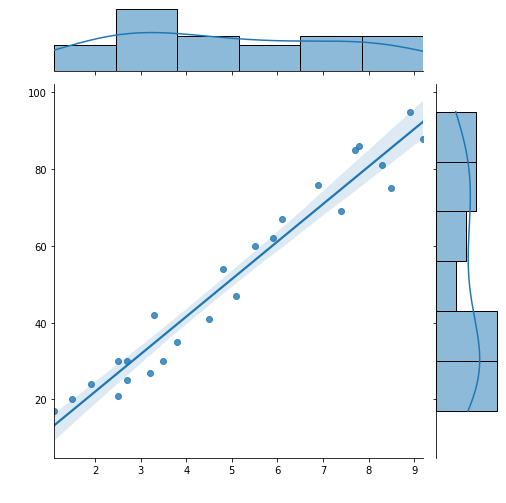

In [45]:
sns.jointplot(x='Hours',y='Scores',kind='reg',data=df,height=7);
plt.xlabel('Hours',fontdict=font)
plt.ylabel('Scores',fontdict=font)
plt.show()

1. For Better understanding visualizing a straight line through our DataPoints

##Data Spliting between Attribute and Output

In [35]:
X = df.iloc[:, :-1].values  # Assigned input/attribute ie. Hours to variable X
y = df.iloc[:, 1].values    # Assigned output ie. Scores to variable y

In [36]:
from sklearn.model_selection import train_test_split
print('Import Sucessfull')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


Import Sucessfull


## Model Selection and Fitting

In [37]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
print('Import Sucessfull')

Import Sucessfull


In [38]:
regressor.fit(X_train,y_train)
print('Training Complete')

Training Complete


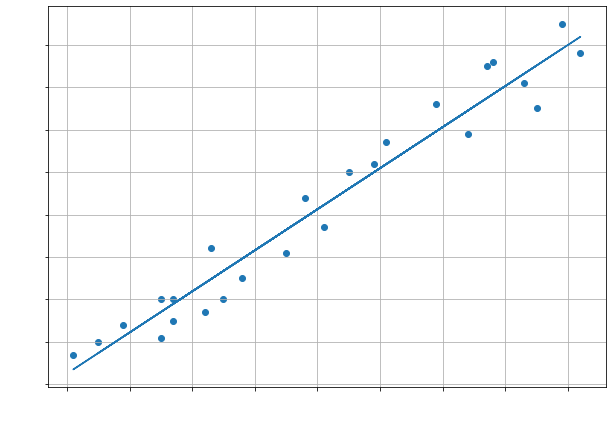

In [39]:
#fitting the line we got through our LinearRegression Modelline = regressor.coef_*X+regressor.intercept_
plt.figure(figsize=(10,7))
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
ax = plt.subplot()
plt.setp(ax.get_xticklabels(), color='white')
plt.setp(ax.get_yticklabels(), color='white')
plt.xlabel('Hours',fontdict=font)
plt.ylabel('Scores',fontdict=font)
plt.plot(X, line);
plt.grid()
plt.show()

1. In above figure we fitted our straight line which we got using the regressor coefficent and intercept

## Result Of Our Model 

In [40]:
# Showing the actual value and predicted value in table format
y_pred = regressor.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


1. Above table show us the Actual value (Scores) and the value we predicted

In [41]:
# Question was asked to predicte the score of 9.25 hrs
hrs = [[9.25]] 
pred_ques = regressor.predict(hrs)
print(f'Hours to predicte {hrs}')
print(f'Score predicted {pred_ques}')

Hours to predicte [[9.25]]
Score predicted [92.38611528]


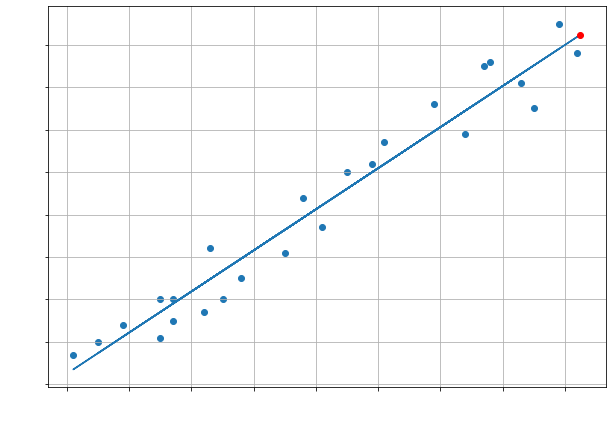

In [42]:
# Ploting the predicted value of 9.25hrs
line = regressor.coef_*X+regressor.intercept_
plt.figure(figsize=(10,7))
plt.scatter(X, y)
ax = plt.subplot()
plt.setp(ax.get_xticklabels(), color='white')
plt.setp(ax.get_yticklabels(), color='white')
plt.xlabel('Hours',fontdict=font)
plt.ylabel('Scores',fontdict=font)
plt.plot(X, line);
plt.plot(hrs, pred_ques,'ro' ) # Predicted Value 
plt.grid()
plt.show()

1. We plotted our score of value "9.25 hrs" which was asked in question to see visually where it fit the model (RED COLOUR POINT)

## Evaluation Metrics -> MAE

In [43]:
from sklearn import metrics

print(f'Mean Absolute Error : {metrics.mean_absolute_error(y_test,y_pred)}')

Mean Absolute Error : 3.9207511902099244
